<a href="https://colab.research.google.com/github/liandeguo/Best-README-Template/blob/master/gold_price_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import numpy as np

# obtain necessary data
data = yf.Ticker("GC=F").history(period="max")
data.drop('Open', axis=1, inplace=True)
data.drop('High', axis=1, inplace=True)
data.drop('Low', axis=1, inplace=True)
data.drop('Volume', axis=1, inplace=True)
data.drop('Dividends', axis=1, inplace=True)
data.drop('Stock Splits', axis=1, inplace=True)

daily_returns = data['Close'].pct_change()

mean = daily_returns.mean()
standard_derivation = daily_returns.std()

print(mean)
print(standard_derivation)
print(daily_returns)

0.0004930965940585461
0.010909067611522496
Date
2000-08-30 00:00:00-04:00         NaN
2000-08-31 00:00:00-04:00    0.016064
2000-09-01 00:00:00-04:00   -0.004671
2000-09-05 00:00:00-04:00   -0.004332
2000-09-06 00:00:00-04:00   -0.005801
                               ...   
2025-10-13 00:00:00-04:00    0.033376
2025-10-14 00:00:00-04:00    0.007326
2025-10-15 00:00:00-04:00    0.009230
2025-10-16 00:00:00-04:00    0.024731
2025-10-17 00:00:00-04:00   -0.015630
Name: Close, Length: 6307, dtype: float64


In [ ]:
#price modelling

simulations = 10000000
price = data.iloc[-1]['Close']

results = []
for i in range (simulations):
  # result = price * np.e ** (mean - 1/2 * standard_derivation ** 2 ) + standard_derivation * np.random.normal(loc=0, scale=1, size=1)
  result = price * np.e ** ((mean - 0.5 * standard_derivation ** 2) + standard_derivation * np.random.normal())
  results.append(result)

results_array = np.array(results)
print(np.average(results_array))
print("5th", np.percentile(results_array, 5))
print("95th", np.percentile(results_array, 95))

4215.374773747447
5th 4140.139659548472
95th 4291.443351425609


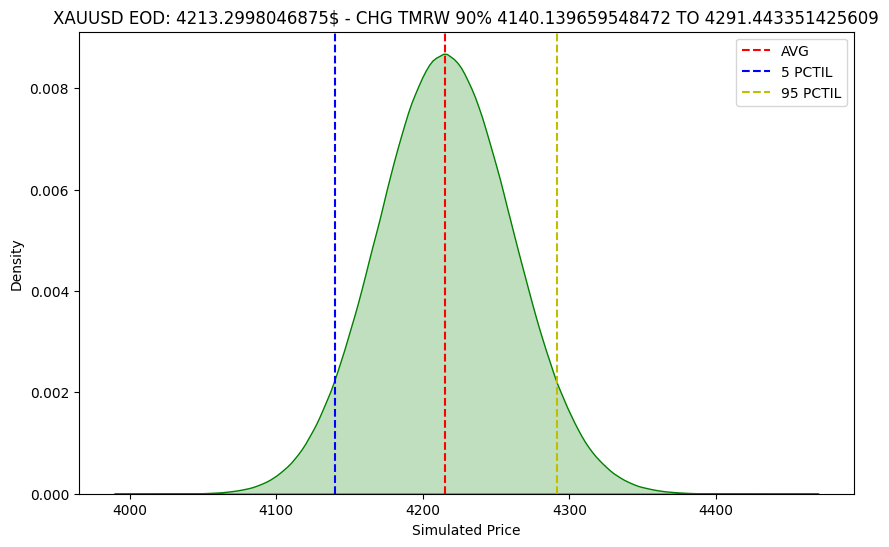

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.kdeplot(results_array, fill=True, color='g')
plt.xlabel('Simulated Price')
plt.ylabel('Density')
plt.axvline(x=np.average(results_array), color='r', linestyle='--', label='AVG')
plt.axvline(x=np.percentile(results_array, 5), color='b', linestyle='--', label='5 PCTIL')
plt.axvline(x=np.percentile(results_array, 95), color='y', linestyle='--', label='95 PCTIL')
plt.legend()
plt.title('XAUUSD EOD: ' + str(price) +'$ - CHG TMRW 90% ' + str(np.percentile(results_array, 5)) + ' TO ' + str(np.percentile(results_array, 95)))
plt.show()